# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

With the growing job market, it makes both employers and the employee life easier if the job postings are used to estimate the salary range. Employers will come to know the industry average for that position. Employee can be confident before-hand that his skills, experience and work achieves right value.

In [412]:
# Analysis libraries
import pandas as pd
import sklearn as sk
import numpy as np
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


#My infor
__author__ = "Sai Lalitha R"
__email__ = "sailalitha.r@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [413]:
#load the data into a Pandas dataframe

#train data
train_features=pd.read_csv("/Users/sailalithasadhu/Desktop/DSDJ/Projects/SalaryPredictions/salaryprediction/data/train_features.csv")
train_salaries=pd.read_csv("/Users/sailalithasadhu/Desktop/DSDJ/Projects/SalaryPredictions/salaryprediction/data/train_salaries.csv")

#test data
test_features=pd.read_csv("/Users/sailalithasadhu/Desktop/DSDJ/Projects/SalaryPredictions/salaryprediction/data/test_features.csv")

#merging train data sets into dataframe
df = train_features.merge(train_salaries, how='inner',on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [414]:
df.shape

(1000000, 9)

### ---- 3 Clean the data ----

Check for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [415]:
#checking datatypes of columns
df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [416]:
#checking for duplicate data
df.duplicated().sum()

0

In [417]:
#checking for NaN values
df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [418]:
#checking for invalid data (salary <=0 and removing the row)
df.drop(df[df['salary'] <= 0].index,inplace=True)
df.shape

(999995, 9)

The data is checked for correct datatypes of columns, duplicate data, NaN values and invalid data where salary column is <=0. There are 5 rows with invalid data. Those are removed and now this clean data can be used for data analysis.

### ---- 4 Explore the data (EDA) ----

In [419]:
#summarize numeric feature variable
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [420]:
#summarize categorical feature variable
df.describe(include='object')

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685298557,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


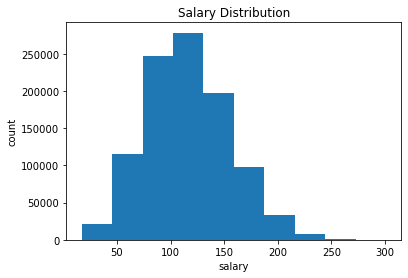

In [421]:
#summarize the target variable
plt.hist(x = 'salary', data=df)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('Salary Distribution')
plt.show()

In [422]:
#count of salaries above 200
df[df['salary'] > 200]['jobType'].value_counts()

CEO               8574
CTO               4843
CFO               4735
VICE_PRESIDENT    2380
MANAGER           1049
SENIOR             397
JUNIOR             159
Name: jobType, dtype: int64

Most of the salaries above 200 value are for CEO, CTO, CFO job types rather than Janitor

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


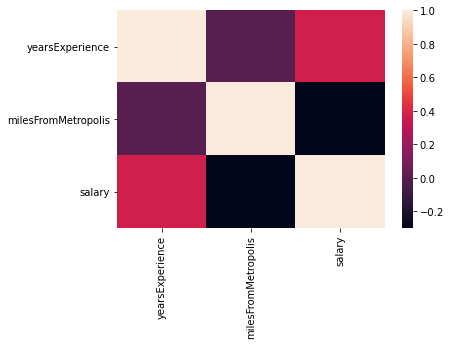

In [423]:
#look for correlation between features and the target
sns.heatmap(df.corr())
df.corr()

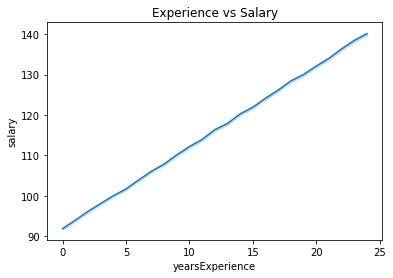

In [424]:
#correlation between years of experience and salary
ex = sns.lineplot(x='yearsExperience', y='salary', data=df)
ex.set_title('Experience vs Salary')
plt.show()

The plot shows there is positive relation between years of experience and salary

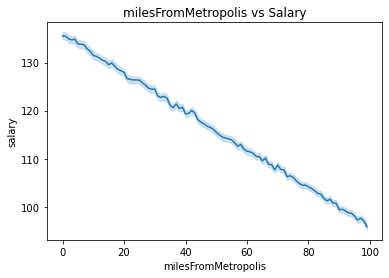

In [425]:
#correlation between milesFromMetropolis and salary
ex = sns.lineplot(x='milesFromMetropolis', y='salary', data=df)
ex.set_title('milesFromMetropolis vs Salary')
plt.show()

Above plot shows negative relation between milesFromMetropolis and salary

In [426]:
#correlation between companyId and salary
df1 = df.groupby(['companyId','jobType']).agg({'salary':'mean'})
df1.columns=['salary']
df1 = df1.reset_index()
df1[df1['jobType']=='MANAGER']['salary'].to_frame('mean salary')

,mean salary
5,115.838305
13,115.510802
21,114.698522
29,114.172959
37,116.148390
...,...
469,115.450409
477,117.280284
485,115.290256
493,114.773489


From above dataframe we can see that all companies mean salaries for a particular jobtype are same. It is not much of an important feature in determining the salary and can be removed

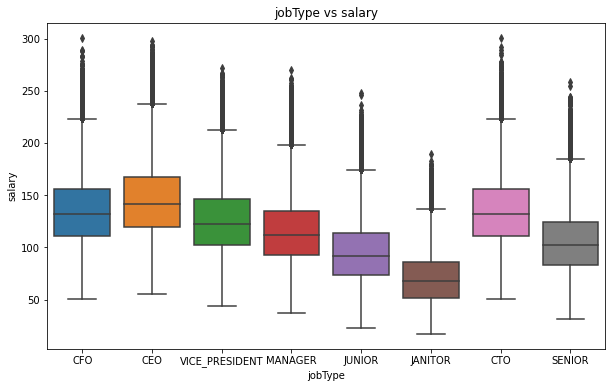

In [427]:
#correlation between jobType and salary
figure(figsize=(10,6))
fig = sns.boxplot(x='jobType',y='salary',data=df)
fig.set_title('jobType vs salary')
plt.show()

It clearly states that CTO, CFO, CEO have higher salaries compared to Janitor

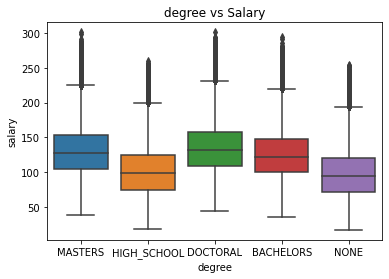

In [428]:
#correlation between degree and salary
fig = sns.boxplot(x='degree',y='salary',data=df)
fig.set_title('degree vs Salary')
plt.show()

Doctoral and Masters degree salaries are comparatively higher

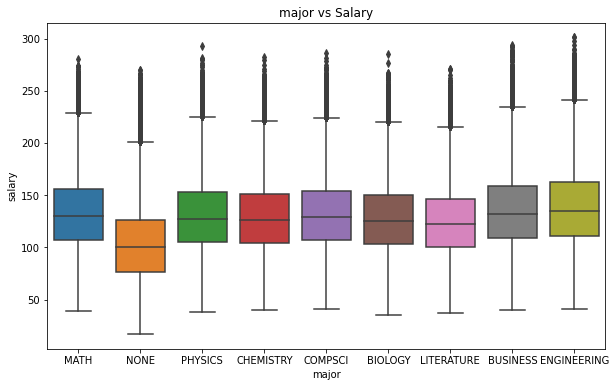

In [429]:
#correlation between major and salary
figure(figsize=(10,6))
fig = sns.boxplot(x='major',y='salary',data=df)
fig.set_title('major vs Salary')
plt.show()

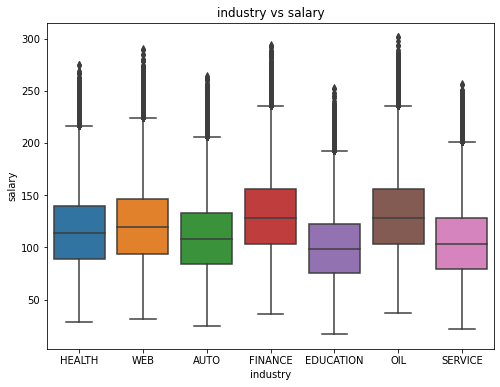

In [430]:
#correlation between industry and salary
figure(figsize=(8,6))
fig = sns.boxplot(x='industry',y='salary',data=df)
fig.set_title('industry vs salary')
plt.show()

Finance and oil industries are paying salaries higher comparitively

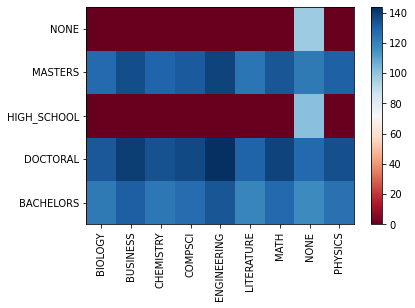

salary                                                  \
major           BIOLOGY    BUSINESS   CHEMISTRY     COMPSCI ENGINEERING   
degree                                                                    
BACHELORS    123.204343  130.890071  123.906966  126.965316  133.522468   
DOCTORAL     132.900799  140.227459  134.241379  136.887929  143.678077   
HIGH_SCHOOL    0.000000    0.000000    0.000000    0.000000    0.000000   
MASTERS      127.744510  135.809151  129.095825  132.436852  138.186407   
NONE           0.000000    0.000000    0.000000    0.000000    0.000000   

                                                             
major        LITERATURE        MATH        NONE     PHYSICS  
degree                                                       
BACHELORS    119.335256  128.211868  117.814699  125.209302  
DOCTORAL     129.674594  138.394916  128.314773  135.252974  
HIGH_SCHOOL    0.000000    0.000000  101.921085    0.000000  
MASTERS      124.215313  133.334637  123.119950  130.622320  
NONE           0.000000    0.000000   98.176882    0.000000

In [431]:
#correlation between degree, major and salary
df_degmaj = df[['degree','major','salary']]
df_groupdm = df_degmaj.groupby(['degree','major'], as_index=False).mean()
df_groupdm_pivot = df_groupdm.pivot(index = 'degree', columns = 'major')
df_groupdm_pivot = df_groupdm_pivot.fillna(0)


fig, ax = plt.subplots()
im = ax.pcolor(df_groupdm_pivot, cmap='RdBu')

#label names
row_labels = df_groupdm_pivot.columns.levels[1]
col_labels = df_groupdm_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_groupdm_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_groupdm_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()
df_groupdm_pivot

From the above heatmap Doctoral and Masters degrees in Engineering, Business shows relatively higher salaries

In [432]:
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model


In [302]:
#creating dummy variables for categorical columns
df_copy = df
df_dummies = pd.get_dummies(df[df.columns[2:6]], drop_first = True)
df_copy = df_copy.drop(df.columns[2:6],axis = 1)
# Join the encoded df
df_copy = df_copy.join(df_dummies)
df_copy.head()

,jobId,companyId,yearsExperience,milesFromMetropolis,salary,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,1362684407687,37,10,83,130,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1362684407688,19,3,73,101,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1362684407689,52,10,38,137,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1362684407690,38,8,17,142,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1362684407691,7,8,16,163,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data